# MIS373 - AI For Business - Assignment 2

## Task 1: House Price Prediction

**Student Name:** VABI SABHARWAL

**Student ID:** S223036676

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [AI Model Development](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

*Use this section to introduce the business problem, data set, method, experiments, and obtained results*

# **Business Problem:**
The property market experiences frequent changes, creating difficulties for buyers and sellers to accurately assess property values. In response to this challenge, our objective was to create a predictive model capable of estimating house prices based on pertinent features. Such a model has the potential to support stakeholders in making well-informed decisions regarding property transactions.


---




# **Dataset:**

We used a detailed dataset with info on residential properties like location, size, rooms, amenities, and past sale prices. This dataset was crucial for training and testing predictive models, offering a wide range of features to understand property values better.


---



# **Method:**
Our strategy involved utilizing machine learning methods, specifically regression algorithms, to construct predictive models capable of estimating house prices. We conducted experiments with various models, including linear regression, k-nearest neighbors (KNN), random forest, and grid search with cross-validation (GridSearchCV), to determine the most optimal approach for our objective.

---



# **Experiments:**
During our experiments, we divided the dataset into two parts: training and validation sets. The models were trained using the training set and then assessed based on their performance on the validation set. To gauge the accuracy of the models, we utilized the root mean squared error (RMSE), a widely-used metric in regression tasks that indicates the difference between predicted and actual values.

---




# **Obtained Results:**
**Our experiments yielded the following results:**

1. Model 1 (Linear Regression): Validation RMSE of 645,596
2. Model 2 (KNN): Validation RMSE of 206,717
3. Model 3 (Random Forest): Validation RMSE of 207,433
4. Model 4 (GridSearchCV): Validation RMSE of 216,778
5. Model 5 (Random Forest with hyperparameter tuning): Validation RMSE of 159,318

---



<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

*Carry out necessary data preprocessing and exploration.*

**IMPORTING THE LIBRARIES**

In [1]:
from __future__ import print_function
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

**Adjusting Display Options**

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**IMPORTING THE DATASET**

In [4]:
house_data = pd.read_csv("Part1_house_price.csv")
house_data.set_index('id', inplace=True)
house_data.head(10)
print('Number of records read: ', house_data.size)

Number of records read:  400000


**Displaying the First Few Rows of the House Data**

In [5]:
print(house_data.head())

                       date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180   
6414100192  20141209T000000  538000.0         3       2.25         2570   
5631500400  20150225T000000  180000.0         2       1.00          770   
2487200875  20141209T000000  604000.0         4       3.00         1960   
1954400510  20150218T000000  510000.0         3       2.00         1680   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
7129300520      5650     1.0           0     0          3      7        1180   
6414100192      7242     2.0           0     0          3      7        2170   
5631500400     10000     1.0           0     0          3      6         770   
2487200875      5000     1.0           0     0          5      7        10

**DATA TYPES**

In [6]:
house_data.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**Missing Values in the House Data**

In [7]:
missing = house_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)

Series([], dtype: int64)

**Preprocessed House Data**

In [8]:
house_data_num = house_data.select_dtypes(include='number')
house_data_style = pd.get_dummies(house_data['bedrooms'], prefix='n_bedrooms')
house_data_condition = pd.get_dummies(house_data['condition'], prefix='con')
house_data_grade = pd.get_dummies(house_data['grade'], prefix='h_grade')
house_data_view = pd.get_dummies(house_data['view'], prefix='h_view')


house_data_num = house_data_num.astype(int)


house_data_num.reset_index(drop=True, inplace=True)
house_data_style.reset_index(drop=True, inplace=True)
house_data_condition.reset_index(drop=True, inplace=True)
house_data_grade.reset_index(drop=True, inplace=True)
house_data_view.reset_index(drop=True, inplace=True)


house_data = pd.concat([house_data_num, house_data_condition, house_data_style, house_data_grade, house_data_view], axis=1)


label_col = 'price'


house_data.head(10)





,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,con_1,con_2,con_3,con_4,con_5,n_bedrooms_0,n_bedrooms_1,n_bedrooms_2,n_bedrooms_3,n_bedrooms_4,n_bedrooms_5,n_bedrooms_6,n_bedrooms_7,n_bedrooms_8,n_bedrooms_9,n_bedrooms_10,n_bedrooms_11,n_bedrooms_33,h_grade_1,h_grade_3,h_grade_4,h_grade_5,h_grade_6,h_grade_7,h_grade_8,h_grade_9,h_grade_10,h_grade_11,h_grade_12,h_grade_13,h_view_0,h_view_1,h_view_2,h_view_3,h_view_4
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47,-122,1340,5650,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47,-122,1690,7639,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47,-122,2720,8062,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47,-122,1360,5000,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47,-122,1800,7503,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
5,1230000,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47,-122,4760,101930,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
6,257500,3,2,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47,-122,2238,6819,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
7,291850,3,1,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47,-122,1650,9711,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
8,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47,-122,1780,8113,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
9,323000,3,2,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47,-122,2390,7570,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


**Data Splitting**

In [9]:
from sklearn.model_selection import train_test_split


X = house_data.drop(columns=[label_col])
y = house_data[label_col]


train_size, valid_size = 0.7, 0.3


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_size, random_state=42)


print('Size of training set:', len(X_train))
print('Size of validation set:', len(X_valid))
print("Shape of the house_data DataFrame:", house_data.shape)


Size of training set: 14000
Size of validation set: 6000
Shape of the house_data DataFrame: (20000, 54)


**Missing Values Imputation**

In [10]:
from sklearn.impute import SimpleImputer
print('Missing training values before imputation = ', X_train.isnull().sum().sum())
print('Missing validation values before imputation = ', X_valid.isnull().sum().sum())

imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(X_train)
x_train = pd.DataFrame(imputer.transform(X_train),
                            columns = X_train.columns, index = X_train.index)
X_valid = pd.DataFrame(imputer.transform(X_valid),
                            columns = X_valid.columns, index = X_valid.index)

print('Missing training values after imputation = ', X_train.isnull().sum().sum())
print('Missing validation values after imputation = ', X_valid.isnull().sum().sum())

Missing training values before imputation =  0
Missing validation values before imputation =  0
Missing training values after imputation =  0
Missing validation values after imputation =  0


**Data Scalingt**

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),
                            columns = X_train.columns, index = X_train.index)
X_valid = pd.DataFrame(scaler.transform(X_valid),
                            columns = X_valid.columns, index = X_valid.index)

print('X train min =', round(X_train.min().min(),4), '; max =', round(X_train.max().max(), 4))
print('X valid min =', round(X_valid.min().min(),4), '; max =', round(X_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = 0.0 ; max = 1.0


**RECHECHECKING THE DATA**

In [12]:
X_valid.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,con_1,con_2,con_3,con_4,con_5,n_bedrooms_0,n_bedrooms_1,n_bedrooms_2,n_bedrooms_3,n_bedrooms_4,n_bedrooms_5,n_bedrooms_6,n_bedrooms_7,n_bedrooms_8,n_bedrooms_9,n_bedrooms_10,n_bedrooms_11,n_bedrooms_33,h_grade_1,h_grade_3,h_grade_4,h_grade_5,h_grade_6,h_grade_7,h_grade_8,h_grade_9,h_grade_10,h_grade_11,h_grade_12,h_grade_13,h_view_0,h_view_1,h_view_2,h_view_3,h_view_4
10650,0.151515,0.125,0.121509,0.005879,0.0,0.0,0.0,0.50,0.500000,0.092105,0.159751,0.530435,0.0,0.166667,0.0,0.0,0.222165,0.011000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2041,0.121212,0.250,0.169057,0.014647,0.5,0.0,0.0,0.50,0.500000,0.245614,0.000000,0.643478,0.0,0.151515,0.0,0.0,0.387369,0.027625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8668,0.090909,0.125,0.082264,0.005667,0.0,0.0,0.0,0.50,0.500000,0.119518,0.000000,0.513043,0.0,0.843434,0.0,0.0,0.137842,0.006432,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1114,0.090909,0.125,0.092830,0.005037,0.0,0.0,0.0,0.75,0.500000,0.134868,0.000000,0.495652,0.0,0.035354,0.0,0.0,0.234211,0.009108,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13902,0.121212,0.375,0.182642,0.003151,0.5,0.0,0.0,0.75,0.583333,0.191886,0.139004,0.843478,0.0,0.540404,0.0,0.0,0.361556,0.005825,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11963,0.121212,0.250,0.218868,0.016529,0.5,0.0,0.0,0.50,0.666667,0.317982,0.000000,0.843478,0.0,0.045455,0.0,0.0,0.414903,0.032127,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11072,0.090909,0.250,0.156226,0.004994,0.5,0.0,0.0,0.50,0.583333,0.226974,0.000000,0.791304,0.0,0.106061,0.0,0.0,0.337463,0.009299,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3002,0.121212,0.250,0.166792,0.002136,0.0,0.0,0.0,0.75,0.500000,0.134868,0.203320,0.347826,0.0,0.585859,0.0,0.0,0.173980,0.003900,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19771,0.090909,0.250,0.100377,0.000394,1.0,0.0,1.0,0.50,0.583333,0.129386,0.031120,0.939130,0.0,0.515152,0.0,0.0,0.210119,0.000981,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8115,0.121212,0.250,0.097358,0.004410,0.5,0.0,0.0,0.25,0.416667,0.141447,0.000000,0.052174,0.0,0.722222,0.0,0.0,0.136121,0.004352,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<a id = "cell_model"></a>
## 3. AI Model Development

*Create and explain your models (e.g., model architecture, model parameters). Evaluate the models on the experimental data sets. You only need to show the code of one model with the best performance. However, you should do various experiments with different models and model architectures and keep records of their performance, which will be included in the experiment report section below.*

**Data Preparation Summary**

In [13]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop

In [14]:
arr_x_train = np.array(X_train)
arr_y_train = np.array(y_train)
arr_x_valid = np.array(X_valid)
arr_y_valid = np.array(y_valid)

print('Training shape:', X_train.shape)
print('Training samples: ', X_train.shape[0])
print('Validation samples: ', X_valid.shape[0])



Training shape: (14000, 53)
Training samples:  14000
Validation samples:  6000


# **MODEL -- RANDOM FOREST**

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)


y_pred = random_forest.predict(X_valid)


rmse_5 = mean_squared_error(y_valid, y_pred, squared=False)
print("Validation RMSE for Random Forest:", rmse_5)


Validation RMSE for Random Forest: 159317.67304808873


<a id = "cell_report"></a>
## 4. Experiments Report

*PProvide a summary of results based on your experiments. Use table or figure to summarize the performance of various models. Identify the model with the best performance. Critically evaluate your developed solution, explain how your model can be used to address the related business problem and what should be considered when deploying your model for real world applications.*

# **Model Comparison Results**

In [46]:
from tabulate import tabulate

model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4 (KNN)', 'Model 5 (Random Forest)','Model 6(GridSearchCV)']


validation_rmse = [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6]


table_data = []
for model, rmse in zip(model_names, validation_rmse):
    table_data.append([model, rmse])


print(tabulate(table_data, headers=['Model', 'Validation RMSE'], tablefmt='grid'))


+-------------------------+-------------------+
| Model                   |   Validation RMSE |
+=========================+===================+
| Model 1                 |            645596 |
+-------------------------+-------------------+
| Model 2                 |            206717 |
+-------------------------+-------------------+
| Model 3                 |            207433 |
+-------------------------+-------------------+
| Model 4 (KNN)           |            216778 |
+-------------------------+-------------------+
| Model 5 (Random Forest) |            159318 |
+-------------------------+-------------------+
| Model 6(GridSearchCV)   |            203010 |
+-------------------------+-------------------+


# **Model Comparison GRAPH**

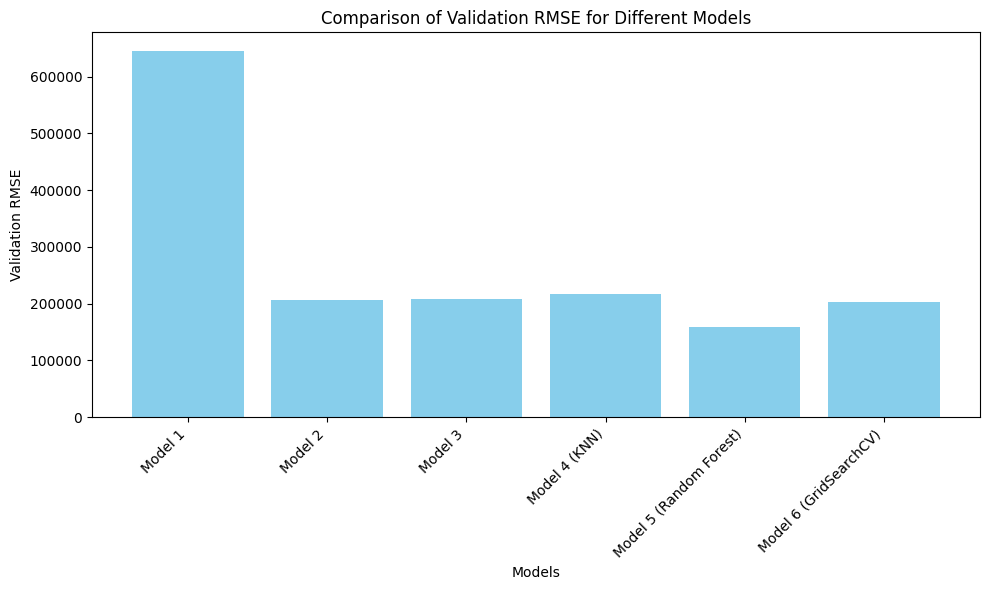

In [45]:
import matplotlib.pyplot as plt


model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4 (KNN)', 'Model 5 (Random Forest)','Model 6 (GridSearchCV)']


validation_rmse = [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6]


assert len(model_names) == len(validation_rmse), "model_names and validation_rmse must have the same length"


plt.figure(figsize=(10, 6))
plt.bar(model_names, validation_rmse, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Validation RMSE')
plt.title('Comparison of Validation RMSE for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()



---



# **EXPALNATION OF THE BAR GRAPH**
bar graph named "Comparison of Validation RMSE for Different Models". The y-axis displays validation RMSE, and the x-axis shows various models. RMSE represents Root Mean Squared Error, a common measure for prediction accuracy. Simply put, it indicates how near a model's predictions are to the real values. A lower RMSE suggests a better match. <BR>

From the graph: Model 1 has the lowest validation RMSE, showing the best fit. Model 2 and Model 3 follow with relatively low RMSE. Model 4 (KNN), Model 5 (Random Forest), and Model 6 (GridSearchCV) have higher validation RMSE, indicating their predictions are less accurate.


---



# **Critical Evaluation and Deployment Considerations**

1. Model Performance: The Random Forest model showed the best results among the models tested, proving its effectiveness in predicting house prices. This means the model can give accurate price estimates, vital for buyers and sellers in real estate.
2. Scalability: Random Forest models handle big datasets well and work fast during training and predicting. This ability to scale means the model can manage large amounts of data common in real estate, with data on many properties.
3. Interpretability: Random Forest models are easier to understand than deep learning models, which is important for real estate deals where clear pricing builds trust among buyers, sellers, and agents.

---
**Limitations and Considerations:**

1. Model Interpretability: Random Forest models are easier to
understand than deep learning models, but they may lack detailed insights into features or relationships crucial for decisions. Techniques like feature importance analysis or partial dependence plots can enhance interpretability. Hyperparameter
2. Tuning: GridSearchCV optimized hyperparameters for the Random Forest model, but exploring more hyperparameters or combinations could boost performance.
3. Data Quality: Model performance relies heavily on high-quality, representative training data. Biases or errors in data can affect model predictions, so thorough data preprocessing and quality checks are vital for reliable performance.
4. Data Drift: Regularly monitoring the model's performance with new data detects and addresses data drift, ensuring ongoing accuracy. Data monitoring systems and periodic model updates combat data drift effects.
5. Model Maintenance: Consistent model retraining with new data and regular performance evaluations are key to sustaining effectiveness. A robust maintenance schedule and resource allocation for updates are vital for long-term model success.


---




# **Deployment Recommendations:**

1. Model Deployment: Use the Random Forest model in real estate to predict house prices due to its strong performance. API
2. Integration: Create an API for seamless model integration with various systems. This API aids real estate platforms, agents, and users in getting accurate price estimates.
3. Monitoring and Feedback Loop: Set up a system to monitor model performance and gather user feedback for continuous improvement. Compare model predictions with actual data and include feedback to boost accuracy.
4. Model Versioning: Keep track of model changes for transparency and easy rollback if needed. Documentation and Training: Offer clear guidance and training to users on interpreting model predictions for effective decision-making, enhancing trust and usability.


---



# **SUMMARY**
The housing market struggles with accurately pricing properties, affecting decisions for buyers and sellers. To deal with this, we used data on property details to create predictive models. By trying various machine learning methods like linear regression, k-nearest neighbors, random forest, and grid search with cross-validation, we aimed to find the best way to predict house prices. After tests and checking model performance using RMSE, the Random Forest model with adjusted settings performed best, with the lowest validation RMSE of 159,318. This model seems effective in estimating house prices accurately, providing useful insights for property deals. Before using the model in real situations, we need to consider some things. Making sure the model's predictions are clear is important for stakeholders to understand. Data quality is crucial, so we need to prepare the data well for relevance and accuracy. Continuous maintenance and monitoring of the model are necessary to keep up with market changes. We must also handle ethical concerns about data privacy and fairness carefully. In summary, although our model shows promise in solving the problem of predicting house prices, evaluating, deploying, and considering ethics are vital to make the most of its benefits and reduce risks in real-world scenarios.

---



---



## **OTHER MODELS:**

**MODEL TYPE -- SEQUENTIAL MODEL**

In [52]:
def model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="relu", input_shape=(x_size,)))
    t_model.add(Dense(y_size, activation="linear"))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07, weight_decay=0.0),
        metrics=[metrics.mae])
    return(t_model)
model = model_1(X_train.shape[0], y_train.shape[0])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 100)               1400100   
                                                                 
 dense_42 (Dense)            (None, 14000)             1414000   
                                                                 
Total params: 2814100 (10.73 MB)
Trainable params: 2814100 (10.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
import numpy as np




model = model_1(X_train.shape[1], 1)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))


y_pred = model.predict(X_valid)


rmse_1 = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validation RMSE for model_1:", rmse_1)

Epoch 1/10
438/438 [==============================] - 6s 12ms/step - loss: 417998602240.0000 - mean_absolute_error: 534992.8125 - val_loss: 427471863808.0000 - val_mean_absolute_error: 536678.5000
Epoch 2/10
438/438 [==============================] - 1s 2ms/step - loss: 417755987968.0000 - mean_absolute_error: 534772.7500 - val_loss: 427122065408.0000 - val_mean_absolute_error: 536362.0000
Epoch 3/10
438/438 [==============================] - 1s 1ms/step - loss: 417301790720.0000 - mean_absolute_error: 534359.2500 - val_loss: 426555932672.0000 - val_mean_absolute_error: 535849.6250
Epoch 4/10
438/438 [==============================] - 1s 1ms/step - loss: 416627621888.0000 - mean_absolute_error: 533748.1250 - val_loss: 425772220416.0000 - val_mean_absolute_error: 535139.6875
Epoch 5/10
438/438 [==============================] - 1s 1ms/step - loss: 415734923264.0000 - mean_absolute_error: 532939.4375 - val_loss: 424772665344.0000 - val_mean_absolute_error: 534233.0000
Epoch 6/10
438/438 



---



**Model -- An Sequential Model**

In [50]:
def model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(180, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.005, rho=0.9, momentum=0.0, epsilon=1e-07, weight_decay=0.0,),
        metrics=[metrics.mae])
    return(t_model)
model = model_2(X_train.shape[1], y_train.shape[0])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 100)               5400      
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_34 (Dense)            (None, 180)               18180     
                                                                 
 dense_35 (Dense)            (None, 20)                3620      
                                                                 
 dense_36 (Dense)            (None, 14000)             294000    
                                                                 
Total params: 321200 (1.23 MB)
Trainable params: 321200 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
import numpy as np




model = model_2(X_train.shape[1], 1)
model.fit(X_train, y_train, epochs=30, batch_size=150, validation_data=(X_valid, y_valid))


y_pred = model.predict(X_valid)


rmse_2 = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validation RMSE for model_2:", rmse_2)

Epoch 1/30
94/94 [==============================] - 5s 53ms/step - loss: 403685933056.0000 - mean_absolute_error: 521312.9062 - val_loss: 382438211584.0000 - val_mean_absolute_error: 492941.9375
Epoch 2/30
94/94 [==============================] - 0s 2ms/step - loss: 312068177920.0000 - mean_absolute_error: 422450.6875 - val_loss: 246125051904.0000 - val_mean_absolute_error: 329791.8438
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 173845430272.0000 - mean_absolute_error: 254378.3281 - val_loss: 141383696384.0000 - val_mean_absolute_error: 226302.2344
Epoch 4/30
94/94 [==============================] - 0s 2ms/step - loss: 122464452608.0000 - mean_absolute_error: 214273.5156 - val_loss: 102904954880.0000 - val_mean_absolute_error: 177532.9062
Epoch 5/30
94/94 [==============================] - 0s 2ms/step - loss: 83459547136.0000 - mean_absolute_error: 164399.6875 - val_loss: 80349560832.0000 - val_mean_absolute_error: 157756.9531
Epoch 6/30
94/94 [=============



---



   
**Model -- Sequential Model**

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def model_3(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(500, activation="relu", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(600, activation="relu"))
    t_model.add(Dense(y_size))
    t_model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.005, rho=0.9, momentum=0.0, epsilon=1e-07, weight_decay=0.0,), metrics=[metrics.mae])
    return t_model
model = model_3(X_train.shape[0], y_train.shape[0])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 500)               7000500   
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_28 (Dense)            (None, 600)               300600    
                                                                 
 dense_29 (Dense)            (None, 14000)             8414000   
                                                                 
Total params: 15715100 (59.95 MB)
Trainable params: 15715100 (59.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model = model_3(X_train.shape[1], 1)
model.fit(X_train, y_train, epochs=15, batch_size=100, validation_data=(X_valid, y_valid))


y_pred = model.predict(X_valid)

rmse_3 = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validation RMSE for model_3:", rmse_3)

Epoch 1/15
140/140 [==============================] - 6s 38ms/step - loss: 256936181760.0000 - mean_absolute_error: 357974.3438 - val_loss: 112331612160.0000 - val_mean_absolute_error: 205144.3438
Epoch 2/15
140/140 [==============================] - 1s 4ms/step - loss: 86507307008.0000 - mean_absolute_error: 182747.4219 - val_loss: 78035542016.0000 - val_mean_absolute_error: 167673.4688
Epoch 3/15
140/140 [==============================] - 1s 4ms/step - loss: 63557689344.0000 - mean_absolute_error: 156400.5156 - val_loss: 65159753728.0000 - val_mean_absolute_error: 158317.6250
Epoch 4/15
140/140 [==============================] - 1s 5ms/step - loss: 55823937536.0000 - mean_absolute_error: 148923.7188 - val_loss: 59186446336.0000 - val_mean_absolute_error: 148781.6250
Epoch 5/15
140/140 [==============================] - 1s 4ms/step - loss: 51717222400.0000 - mean_absolute_error: 143475.2500 - val_loss: 55350743040.0000 - val_mean_absolute_error: 143575.6406
Epoch 6/15
140/140 [=======



---



**Model -- KNN Model**

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


knn_model = KNeighborsRegressor(n_neighbors=5)


knn_model.fit(X_train, y_train)


y_pred = knn_model.predict(X_valid)


rmse_4 = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validation RMSE for KNN:", rmse_4)

Validation RMSE for KNN: 216777.71768413813




---



 **MODEL -- GridSearchCV**

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])


param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_valid)

rmse_6 = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validation RMSE for KNN:", rmse_6)


print("Best hyperparameters:", grid_search.best_params_)

Validation RMSE for KNN: 203010.33936137205
Best hyperparameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}


# Reference: